In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Find the Sampling_rate
2. If the frequency of the signal is much lesser than the SR, then doensample.
3. Say to fs = 2000 (Max - 5000)
4. Dataset! Save it in 'a'. (See below)

In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 40.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import scipy
import pandas as pd

#a = np.load('/content/drive/MyDrive/Dataset/audio_notes.npy')[:, 0:1000]

# Should be of the form (no_of_samples, Sampling_Rate, 1)

In [ ]:
ds = tfds.load('nsynth/gansynth_subset.f0_and_loudness', split='train[:5%]')
assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...:   0%|          | 0/229 [00:00<?, ? file/s]

Dataset nsynth downloaded and prepared to /root/tensorflow_datasets/nsynth/gansynth_subset.f0_and_loudness/2.3.3. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'audio': TensorSpec(shape=(64000,), dtype=tf.float32, name=None), 'f0': {'confidence': TensorSpec(shape=(1000,), dtype=tf.float32, name=None), 'hz': TensorSpec(shape=(1000,), dtype=tf.float32, name=None), 'midi': TensorSpec(shape=(1000,), dtype=tf.float32, name=None)}, 'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'instrument': {'family': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'source': TensorSpec(shape=(), dtype=tf.int64, name=None)}, 'loudness': {'db': TensorSpec(shape=(1000,), dtype=tf.float32, name=None)}, 'pitch': TensorSpec(shape=(), dtype=tf.int64, name=None), 'qualities': {'bright': TensorSpec(shape=(), dtype=tf.bool, name=None), 'dark': TensorSpec(shape=(), dtype=tf.bool, name=None), 'distortion': TensorSpec(shape=(), 

In [ ]:
df = tfds.as_dataframe(ds.take(1000))
df.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['audio', 'f0/confidence', 'f0/hz', 'f0/midi', 'id', 'instrument/family',
        'instrument/label', 'instrument/source', 'loudness/db', 'pitch',
        'qualities/bright', 'qualities/dark', 'qualities/distortion',
        'qualities/fast_decay', 'qualities/long_release',
        'qualities/multiphonic', 'qualities/nonlinear_env',
        'qualities/percussive', 'qualities/reverb', 'qualities/tempo-synced',
        'velocity'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=1000, step=1)
 NumericBlock: slice(10, 20, 1), 10 x 1000, dtype: bool
 NumericBlock: [ 5  6  7  9 20], 5 x 1000, dtype: int64
 ObjectBlock: [0 1 2 3 4 8], 6 x 1000, dtype: object,
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>,
 '_StyledDataFrame__styler': <pandas.io.formats.style.Styler at 0x7a61a7ddc280>}

In [ ]:
df['resampled_audio'] = [scipy.signal.resample(audio, 10000) for audio in df['audio']]
print(df['resampled_audio'])
print(df['audio'])

0      [0.1380836, -0.08724973, 0.42509937, 1.028509,...
1      [0.0007979202, -0.0012582702, -0.0036174315, -...
2      [-0.00011276244, 0.00059940334, 0.0015874481, ...
3      [0.008134929, -0.007787537, 0.00864645, -0.007...
4      [0.00048031617, -0.0014674377, -0.0006150742, ...
                             ...                        
995    [1.2481689e-05, -2.1743774e-05, 4.223633e-05, ...
996    [0.062256422, -0.07386413, 0.09048897, -0.4503...
997    [-0.00020029448, 0.00022900391, -0.002390255, ...
998    [0.0009445648, -0.0017602767, 0.0012270012, -0...
999    [-0.0075077075, 0.008009108, -0.008601657, 0.0...
Name: resampled_audio, Length: 1000, dtype: object
0      [0.004453926, 0.105467066, 0.2777211, 0.387332...
1      [-1.3487535e-05, -8.694061e-05, -0.00011358701...
2      [-8.137182e-06, -8.33766e-05, -0.00015843802, ...
3      [-3.2693446e-05, -9.946471e-05, 0.00018629269,...
4      [-4.2361666e-05, -0.00029338757, -0.000492357,...
                             ...     

In [ ]:
df3 = []
# @title Default title text
Index_ = [df["f0/midi"][i][1] <= 40 for i in range(1000)]
for i in range(1000):
    if Index_[i] == True:
      df3.append(df.iloc[i])
df3 = pd.DataFrame(df3)
df3.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['audio', 'f0/confidence', 'f0/hz', 'f0/midi', 'id', 'instrument/family',
        'instrument/label', 'instrument/source', 'loudness/db', 'pitch',
        'qualities/bright', 'qualities/dark', 'qualities/distortion',
        'qualities/fast_decay', 'qualities/long_release',
        'qualities/multiphonic', 'qualities/nonlinear_env',
        'qualities/percussive', 'qualities/reverb', 'qualities/tempo-synced',
        'velocity', 'resampled_audio'],
       dtype='object')
 Axis 1: Int64Index([  0,   8,  15,  16,  22,  44,  51,  60,  61,  71,
             ...
             934, 935, 937, 942, 945, 946, 955, 964, 973, 991],
            dtype='int64', length=155)
 NumericBlock: slice(10, 20, 1), 10 x 155, dtype: bool
 NumericBlock: [ 5  6  7  9 20], 5 x 155, dtype: int64
 ObjectBlock: [ 0  1  2  3  4  8 21], 7 x 155, dtype: object,
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>}

In [ ]:
a = df3["resampled_audio"]
a = np.stack(a)
a = np.expand_dims(a, -1)
np.save('/content/drive/MyDrive/Audio/', a)
a.shape
# b = np.load('/content/drive/MyDrive/Audio/.npy')

(155, 10000, 1)

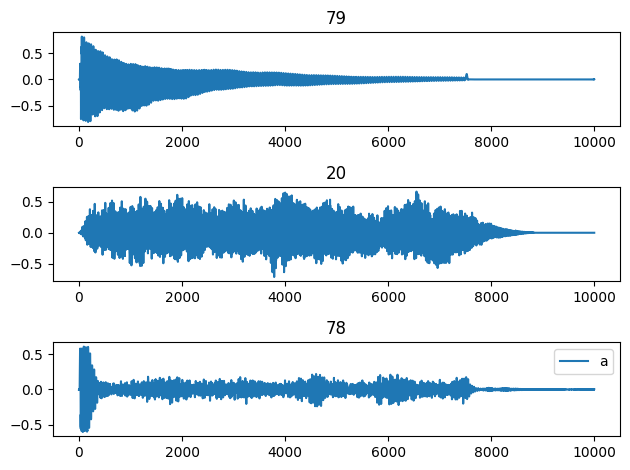

In [ ]:
fig, axs = plt.subplots(3)
for i in range(3):
    ra = np.random.randint(0, 100)
    axs[i].plot(a[ra].reshape(-1), label='a')
    axs[i].set_title(str(ra))
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
@tf.function
def real_cal(r, phi):
    return r * tf.math.cos(phi)

@tf.function
def imag_cal(r, phi):
    return r * tf.math.sin(phi)

@tf.function
def oscillator_loop(X_r, X_i, omegas, num_steps):

    r_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    phi_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    r_t = tf.ones((X_r.shape[0], X_r.shape[-1]))
    phis = tf.zeros((X_r.shape[0], X_r.shape[-1]))
    dt = 0.0001        # 1/fs, fs=16000
    input_scaler = 5
    for t in tf.range(num_steps):
        input_r = input_scaler*X_r[:,t,:]*tf.math.cos(phis)
        input_phi = input_scaler*X_i[:,t,:]*tf.math.sin(phis)
        r_t = r_t + ((1 - 1*tf.square(r_t)) * r_t + input_r) * dt
        phis = phis + (omegas - input_phi) * dt
        r_arr = r_arr.write(r_arr.size(), r_t)
        phi_arr = phi_arr.write(phi_arr.size(), phis)
    r_arr = tf.transpose(r_arr.stack(), [1, 0, 2])
    phi_arr = tf.transpose(phi_arr.stack(), [1, 0, 2])
    return r_arr, phi_arr

class Hopf(tf.keras.layers.Layer):

    def __init__(self, units, num_steps, min_omega=0.1,
                 max_omega=10.1, **kwargs):
        super(Hopf, self).__init__(**kwargs)
        self.units = units
        self.num_steps = num_steps
        self.omegas = tf.linspace(min_omega, max_omega, self.units) * (2*3.1415)
        self.omegas = tf.cast(tf.expand_dims(self.omegas, 0), 'float32')

    def call(self, X_r, X_i):
        r, phi = oscillator_loop(X_r, X_i, self.omegas, self.num_steps)
        z_real = real_cal(r, phi)
        z_imag = imag_cal(r, phi)
        return z_real, z_imag

In [ ]:
duration = 400

class Model(tf.keras.Model):

    def __init__(self, units, **kwargs):

        super(Model, self).__init__(**kwargs)

        self.d1_r = tf.keras.layers.Dense(units,activation='relu')
        self.d1_i = tf.keras.layers.Dense(units,activation='relu')

        self.osc1 = Hopf(units, num_steps=duration, min_omega=40, max_omega=400) # Change it accroding to minimal/maximum frequency in the dataset

        self.d = tf.keras.layers.Dense(units, activation='relu')

        self.out_dense = tf.keras.layers.Dense(1)

    def build(self, input_shape):
        self.built = True

    def call(self, X):

        out1_r = tf.keras.layers.TimeDistributed(self.d1_r)(X)
        out1_i = tf.keras.layers.TimeDistributed(self.d1_i)(X)

        z1_r, z1_i = self.osc1(out1_r, out1_i)

        concat_inp = tf.concat([z1_r, z1_i], 2)

        out2 = tf.keras.layers.TimeDistributed(self.d)(concat_inp)

        out_final = tf.keras.layers.TimeDistributed(self.out_dense)(out2)
        return out_final

model = Model(400) # Number of the Oscillator units.
optimizer = tf.keras.optimizers.Adam(0.001)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                    filepath='/content/drive/MyDrive/Audio', # Change it according to where you wish to save it.
                                    save_weights_only=True,
                                    save_best_only = True)
model.compile(optimizer, 'mse')

In [ ]:
model.fit(a[0:20, :duration], a[0:20, :duration], epochs=50, batch_size=4, validation_split=0.2,
          callbacks=[model_checkpoint_callback])

Epoch 1/50
4/4 [==============================] - 5s 697ms/step - loss: 0.3999 - val_loss: 0.2933
Epoch 2/50
4/4 [==============================] - 4s 1s/step - loss: 0.2611 - val_loss: 0.1451
Epoch 3/50
4/4 [==============================] - 3s 642ms/step - loss: 0.2128 - val_loss: 0.0883
Epoch 4/50
4/4 [==============================] - 2s 502ms/step - loss: 0.1659 - val_loss: 0.1168
Epoch 5/50
4/4 [==============================] - 2s 626ms/step - loss: 0.1267 - val_loss: 0.1271
Epoch 6/50
4/4 [==============================] - 2s 562ms/step - loss: 0.1250 - val_loss: 0.0958
Epoch 7/50
4/4 [==============================] - 3s 785ms/step - loss: 0.1133 - val_loss: 0.0846
Epoch 8/50
4/4 [==============================] - 4s 957ms/step - loss: 0.1094 - val_loss: 0.0916
Epoch 9/50
4/4 [==============================] - 2s 562ms/step - loss: 0.1073 - val_loss: 0.0791
Epoch 10/50
4/4 [==============================] - 3s 646ms/step - loss: 0.1081 - val_loss: 0.0714
Epoch 11/50
4/4 [=====

In [ ]:
out = model.predict(a[0:10], batch_size = 1)
out.shape

10/10 [==============================] - 1s 43ms/step


(10, 400, 1)

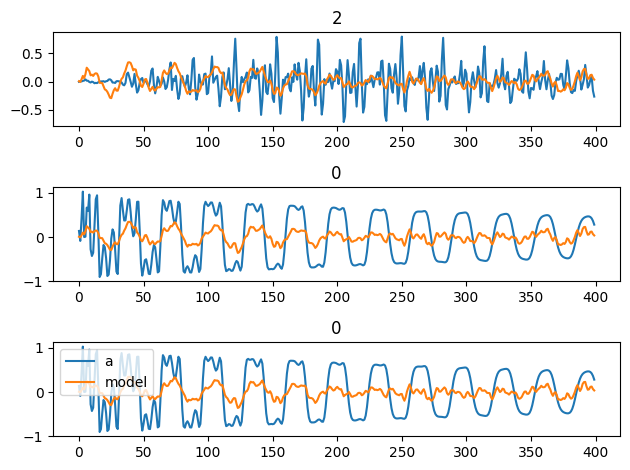

In [ ]:
fig, axs = plt.subplots(3)
for i in range(3):
    ra = np.random.randint(0, 4)
    axs[i].plot(a[ra, :400].reshape(-1), label='a')
    axs[i].plot(out[ra, :400], label = 'model')
    axs[i].set_title(str(ra))
plt.legend()
plt.tight_layout()
plt.show()

**hyperparameter optimisation**